821
[[6.89579518e-15 0.00000000e+00 1.18952467e-13 ... 0.00000000e+00
  6.34413157e-14 0.00000000e+00]
 [7.41136866e-15 0.00000000e+00 1.89781714e-14 ... 0.00000000e+00
  5.69345141e-14 0.00000000e+00]
 [8.46567575e-15 0.00000000e+00 1.75771619e-14 ... 0.00000000e+00
  1.77891529e-14 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.47027880e+00 ... 0.00000000e+00
  1.01214575e+01 5.88235294e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.76190476e+00
  0.00000000e+00 7.14285714e+00]
 [9.29854803e-15 0.00000000e+00 1.47255479e-13 ... 0.00000000e+00
  9.23395321e-15 0.00000000e+00]]
overall
0.03042802626497544
0.2736660782278731
0.00502534183570477
1.6116825063408242
11.130802004846867
0.04175781402814798


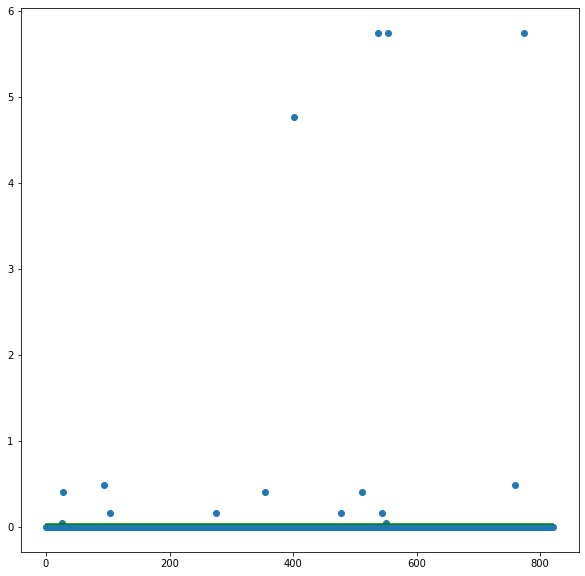

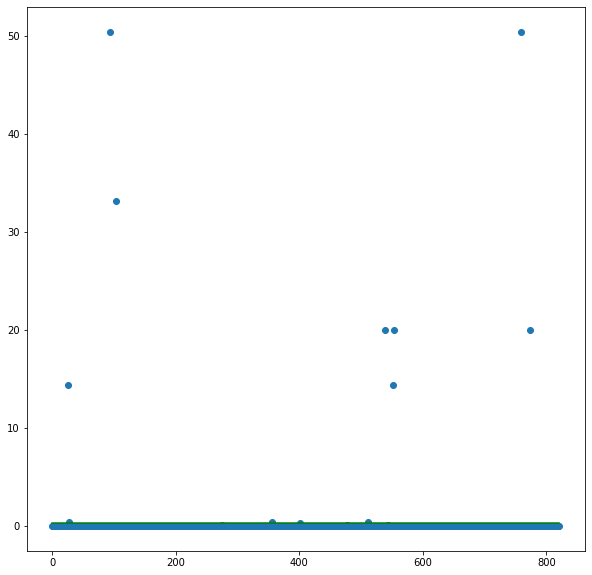

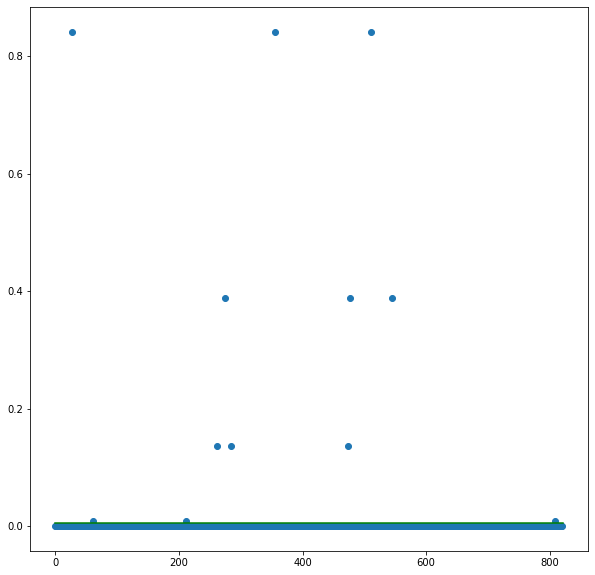

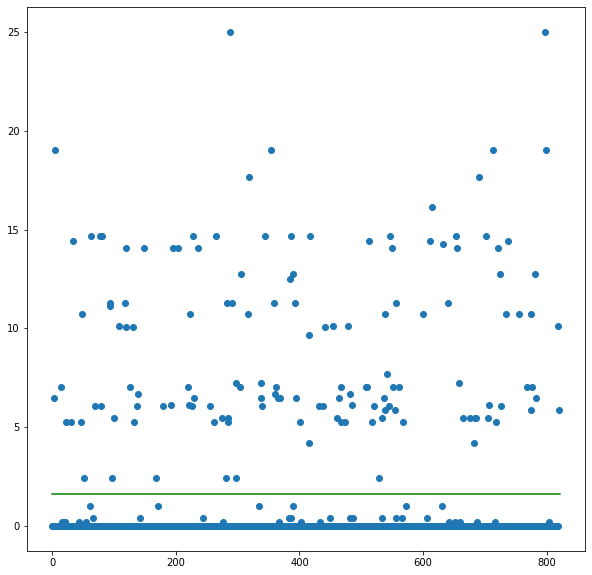

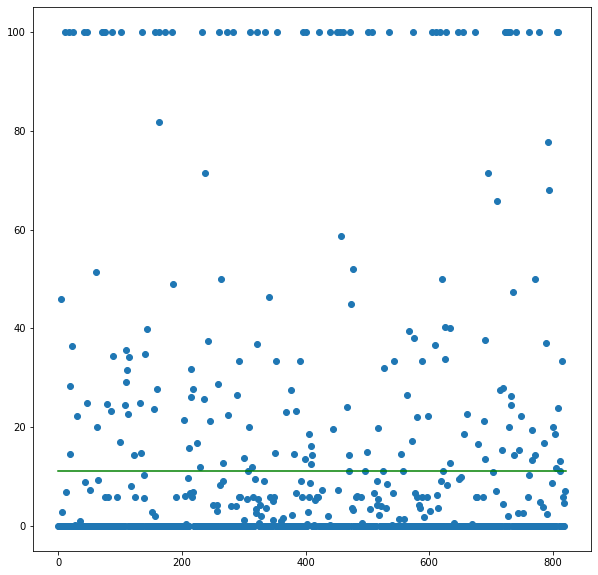

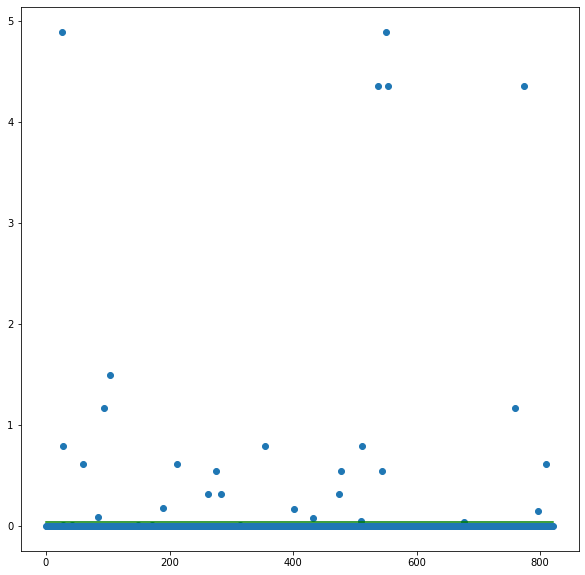

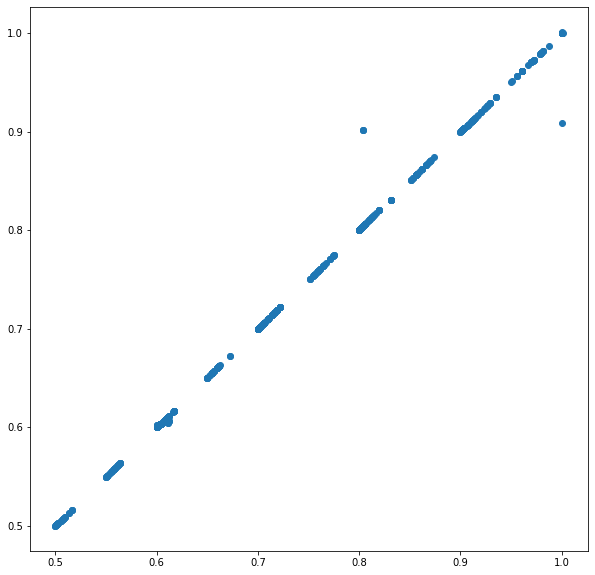

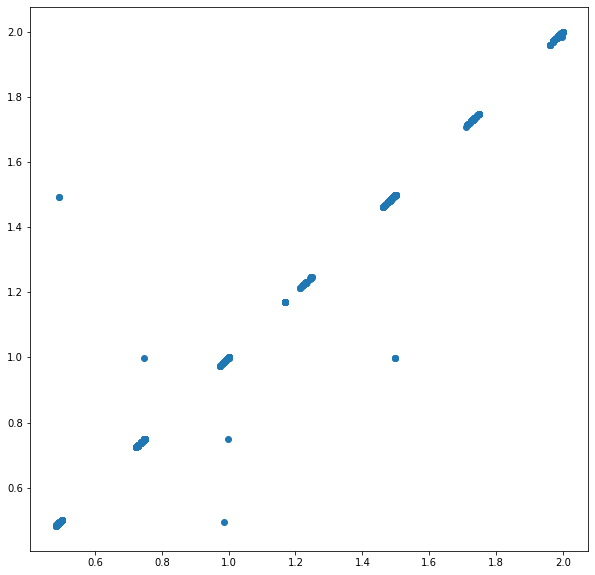

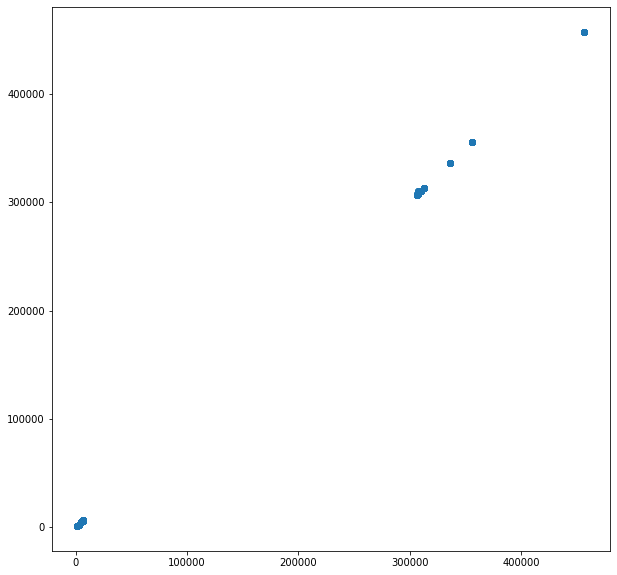

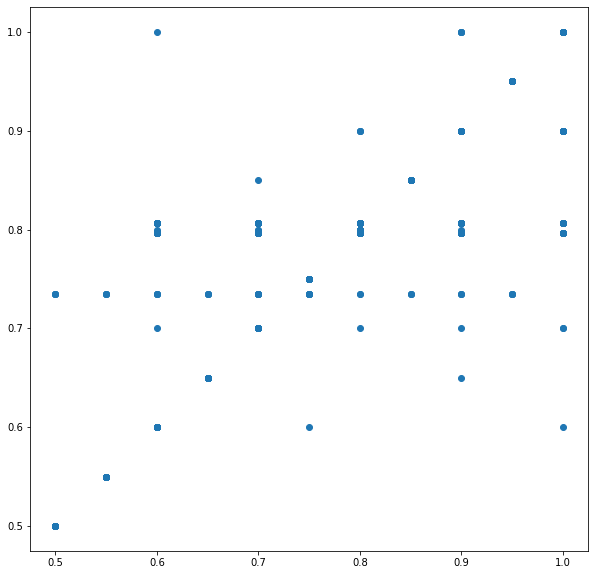

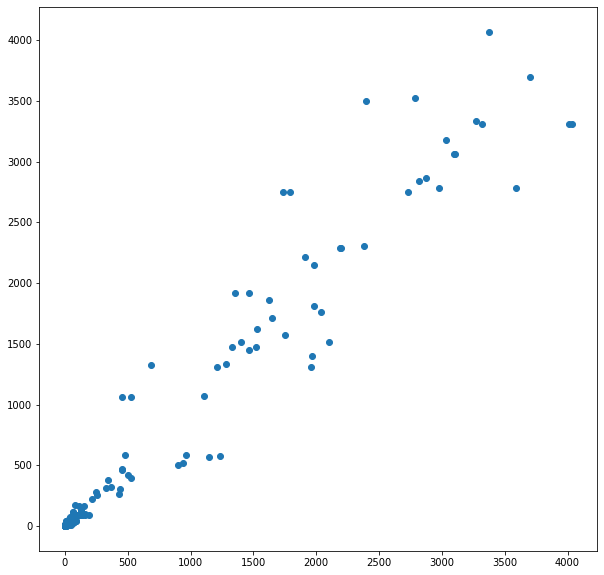

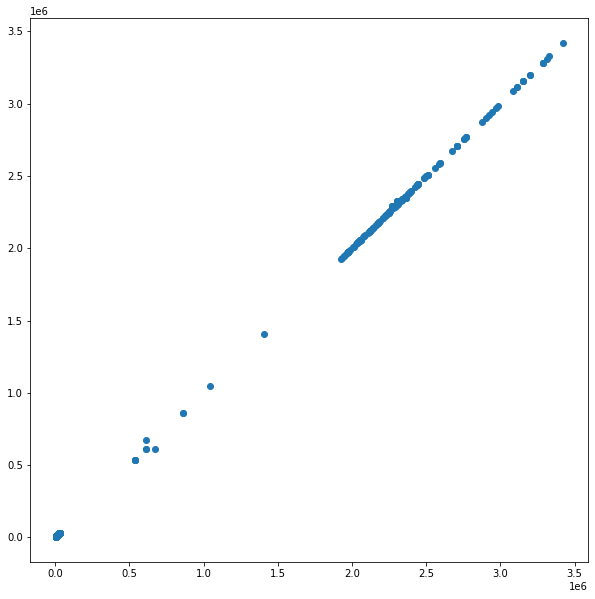

In [3]:
#Decision tree regressor
from sklearn.neighbors import KNeighborsRegressor
# linear regression for multioutput regression
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import seaborn as sn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas
from sklearn.svm import LinearSVR
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xlwt 
from xlwt import Workbook 

wb = Workbook() 


def drawCurve(x,y):
  plt.figure(figsize=(10,10))
  plt.scatter(x,y) 
  plt.plot([0,len(y)],[np.mean(y),np.mean(y)],color = 'g')
  #plt.plot(x,y,marker ='o') # for changing it to scatter plt.scatter() and keep the s which is point size
  
  #plt.savefig('coreUvsDrc.pdf', bbox_inches = 'tight')


def drawRocCurve(x,y):
  plt.figure(figsize=(10,10))
  plt.scatter(x,y) 

dataframe = pandas.read_excel('/content/datasetOrginal1.xlsx')


asr = dataframe['aspectratio'].tolist()
tArea = dataframe['totalarea'].tolist()
tWlen = dataframe['twirelen'].tolist()
cLkp = dataframe['clkperiod'].tolist()
drc = dataframe['drc'].tolist()
coreU = dataframe['coreutil'].tolist()


yOut = []
for i in range(len(asr)):
  yOut.append([coreU[i],asr[i],tArea[i],cLkp[i],drc[i],tWlen[i]])




df = dataframe.drop('aspectratio', axis=1)
df = df.drop('totalarea', axis=1)
df = df.drop('twirelen', axis=1)
df = df.drop('clkperiod', axis=1)
df = df.drop('drc', axis=1)
df = df.drop('coreutil', axis=1)

X = df.values
xTrain = []
xTest = []
yTrain = []
yTest = []

xTrain, xTest, yTrain, yTest = train_test_split(X, yOut, test_size=0.30, random_state=42)

print(len(yTest))

sheet1 = wb.add_sheet('PredOne') 
sheet2 = wb.add_sheet('ActualOne')

model = DecisionTreeRegressor()
model.fit(xTrain,yTrain)




yHat = model.predict(xTest)

errorArray = np.zeros([6,len(yHat)])


#print(len(yHat))
for i in range(6):
  sum1,sum2 = 0,0
  c = 0
  for j in range(0,len(yHat)):
    predOne = np.array(yHat).T[i][j]
    actualOne = np.array(yTest).T[i][j]

    #print(str(predOne)+"------>"+str(actualOne))

    # print(predOne)

    sheet1.write(j,i,str(predOne))
    sheet2.write(j,i,str(actualOne))
   

    if predOne == actualOne:
      errorArray[i][j] = 0
    
    else:
      sum1 = np.abs(np.abs(predOne)-actualOne)
      sum2 = (actualOne+ np.abs(predOne))
      sum = sum1/sum2
      errorArray[i][j] = sum*100
  
  
  

wb.save('output.xls') 
print(errorArray)
print('overall')
#print(np.mean(accuracy))
#[coreU[i],asr[i],tArea[i],cLkp[i],drc[i],tWlen[i]]
sampleNo = [i for i in range(len(yHat))]
for i in range(6):
  drawCurve(sampleNo,list(errorArray[i]))


for i in range(6):
  print(np.mean(list(errorArray[i])))


plot_yHat = yHat.T
plot_yTest = np.array(yTest).T

for i in range(6):
  drawRocCurve(plot_yTest[i],plot_yHat[i])

#Error percentage

# for i in range(len(yHat)):
#   output = ""
#   for j in range(6):
#     calculation = ((yHat[i][j]-yTest[i][j])/yTest[i][j])*100
#     output += str("{:.2f}".format(calculation))+"  "
  
#   print(output)




# overall
# 0.034022236518643605
# 0.6000635542621284
# 0.03532472871419937
# 0.06418293423155867
# 10.861262902897671
# 0.029047691307093636

In [4]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas

import numpy as np


row,col = 6,len(yOut)
arr = np.zeros((row, col)) 
x_t = np.zeros((row, col)) 





x_t = np.array(yOut).T
print('hmm')
print(x_t)

# f = open("demofile3.txt", "w")
# x_t = x_t.T

# for i in range(len(x_t)):
#   for j in range(len(x_t[i])):
#     f.write(str(x_t[i][j])+"\t")
#   f.write('\n')



hmm
[[8.03000000e-01 9.02000000e-01 1.00000000e+00 ... 8.51000000e-01
  9.03000000e-01 9.51000000e-01]
 [4.98000000e-01 4.99000000e-01 5.00000000e-01 ... 9.99000000e-01
  9.97000000e-01 9.99000000e-01]
 [3.13209112e+05 3.13209112e+05 3.13209112e+05 ... 3.55777232e+05
  3.55777232e+05 3.55777232e+05]
 [7.00000000e-01 8.00000000e-01 9.00000000e-01 ... 8.00000000e-01
  8.50000000e-01 9.00000000e-01]
 [1.37000000e+02 1.35400000e+03 2.13400000e+03 ... 1.47800000e+03
  1.73800000e+03 3.37300000e+03]
 [2.05473120e+06 1.98593669e+06 1.90782816e+06 ... 2.32463899e+06
  2.33545820e+06 2.28698373e+06]]


In [5]:
#15 grapharr
from numpy import random
import matplotlib.pyplot as plt 
import numpy as np
import xlwt 
from xlwt import Workbook 
import random
import time


ultimateSol = []



#print(x_t)

ultimatepair = []

#yOut.append([coreU[i],asr[i],tArea[i],cLkp[i],drc[i],tWlen[i]])
co,a_s_r,are_a,cl,dr,wl = [],[],[],[],[],[] 
orginal = []
justforindex = 0

improving = [0.853, 0.498, 355777.232234, 0.8, 2058.0, 2291189.03]
#improving = [1.0, 0.498, 336415.228707, 0.9, 898.0, 2030047.33]



for j in range(len(x_t[0])):
  orginal.append([x_t[0][j],x_t[1][j],x_t[2][j],x_t[3][j],x_t[4][j],x_t[5][j]])
  co.append(x_t[0][j])
  a_s_r.append(x_t[1][j])
  are_a.append(x_t[2][j])
  cl.append(x_t[3][j])
  dr.append(x_t[4][j])
  wl.append(x_t[5][j])

  if x_t[0][j] == improving[0] and x_t[1][j] == improving[1] and x_t[2][j] == improving[2] and x_t[3][j] == improving[3] and x_t[4][j] == improving[4] and x_t[5][j] == improving[5]:
    justforindex = j
    #break

Sol = sorted(orginal,key=lambda x: (x[4]),reverse=True)

# for i in range(len(Sol)):
#    print(Sol[i])

    


for j in range(len(x_t[0])):
  ultimatepair.append([x_t[0][j]/np.max(co),x_t[1][j]/np.max(a_s_r),x_t[2][j]/np.max(are_a),x_t[3][j]/np.max(cl),x_t[4][j]/np.max(dr),x_t[5][j]/np.max(wl)])
  #print(ultimatepair[j])

# def fun(x):
#   return 0.4*x[0] + 0.1*x[1]+1/(0.5*x[2])+1/(0.75*x[3])+1/x[4]+1/(0.25*x[5])

#drc_priority = 1, clk_per_priority=0.75, area_priority=0.5, coreU_priority= 0.4, twl_priority=0.25, asr_priority=0.1

# def fun(x):
#   return x[0]*0.4+x[1]*0.1+0.5/x[2]+0.75/x[3]+1/x[4]+0.25/x[5]

def fun(x):
  return x[0]+x[1]+1/x[2]+1/x[3]+1/x[4]+1/x[5]


def annealing(index):
  T = 1
  T_final = .0000001
  alpha = 0.9


  s = ultimatepair[index]
  #print(s)
  #print(orginal[index])
  updateSol = s
  a = 0.85*ultimatepair[index][2] 
  b = 1.15*ultimatepair[index][2]

  solIndex = index
  while T > T_final:
    n = 0
    while n<2000:
      partSol = random.randint(0,820)
      

      if fun(ultimatepair[partSol]) > fun(updateSol) and ultimatepair[partSol][2] >= a and ultimatepair[partSol][2]<= b :
        updateSol = ultimatepair[partSol]
        solIndex = partSol

      elif ultimatepair[partSol][2] >= a and ultimatepair[partSol][2] <= b:
        delll = fun(updateSol) - fun(ultimatepair[partSol])

        if random.random() > np.exp(-delll/T):
          updateSol = ultimatepair[partSol]
          solIndex = partSol
      
      n=n+1
    

    T = T*alpha

    return solIndex


a = np.array([0,0,0,0,0,0])


print(orginal[justforindex])
start = time.time()
for j in range(100):
  index = annealing(justforindex)
  a=a+np.array(orginal[index])

print(time.time()-start)




np.set_printoptions(suppress=True)
a= list(a/100)
print(a)



r=0

wb = Workbook() 
sheet = wb.add_sheet('sheet') 
sheet.write(r,0,orginal[justforindex][0])
sheet.write(r,1,orginal[justforindex][1])
sheet.write(r,2,orginal[justforindex][2])
sheet.write(r,3,orginal[justforindex][3])
sheet.write(r,4,orginal[justforindex][4])
sheet.write(r,5,orginal[justforindex][5])
sheet.write(r,6,a[0])
sheet.write(r,7,a[1])
sheet.write(r,8,a[2])
sheet.write(r,9,a[3])
sheet.write(r,10,a[4])
sheet.write(r,11,a[5])



wb.save('over.xls')





[0.853, 0.498, 355777.232234, 0.8, 2058.0, 2291189.03]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars


1.665212631225586
[0.7980799999999998, 1.143659999999999, 311448.86122299987, 0.8059999999999999, 587.18, 2132610.206399999]


In [12]:
import random

print(random.random())


0.015357068164150722


In [18]:

print(output)
import random
import matplotlib.pyplot as plt

sol1 = []



for i in range(len(output)-1,-1,-1):
  sol1.append([output[i][0],output[i][1],output[i][2],output[i][3],output[i][4],output[i][5],output[i][6],output[i][7],output[i][8],output[i][9],output[i][10],output[i][11]])
print(sol1)

def drawRocCurve(sol):
  plt.figure(figsize=(10,10))
  print('I am here')
  
  for i in range(len(sol)):
    a = i
    b = sol1[a][3]
    c = sol1[a][9]
    plt.plot([i+1,i+1],[b,c])
    print(sol1[a])
    
  plt.ylabel('Total area', fontsize = 30)
  plt.xlabel('Number of iterations',fontsize=30)
  plt.tick_params(labelsize=25)

  plt.savefig('ara.pdf', bbox_inches = "tight")




# drawRocCurve(ouput)


drawRocCurve(sol1)



NameError: ignored

In [19]:
################################# From here all the output will be printed########################

# r=2
# wb = Workbook() 
# sheet1 = wb.add_sheet('Sheet') 
# sheet1.write(0,0,'index')
# sheet1.write(0,1,'coreUtilization')
# sheet1.write(0,2,'asr')
# sheet1.write(0,3,'tArea')
# sheet1.write(0,4,'clkPeriod')
# sheet1.write(0,5,'drc')
# sheet1.write(0,6,'tWireLength')
# sheet1.write(1,4,'drc')
# checkList = [] 

# for i in range(len(Sol)):
#   if checkList.count(Sol[i][5]) < 1 or True:
#     print(Sol[i])

#     for j in range(len(Sol[i])):
#       sheet1.write(r,j,Sol[i][j])
#     checkList.append(Sol[i][5])
#     r+=1


# sheet1.write(r,4,'TotalArea')
# print('Totalarea')
# r+=1
# Sol = sorted(ultimateSol,key=lambda x: (x[6],x[5],x[4],x[3],x[1]),reverse=False)

# checkList = [] 

# for i in range(len(Sol)):
#   if checkList.count(Sol[i][6]) < 1 or True:
#     print(Sol[i])

#     for j in range(len(Sol[i])):
#       sheet1.write(r,j,Sol[i][j])
#     checkList.append(Sol[i][6])
#     r+=1


# sheet1.write(r,4,'ClockPeriod')
# print('ClockPeriod')
# r+=1
# Sol = sorted(ultimateSol,key=lambda x: (x[4],x[5],x[6],x[3],x[1]),reverse=False)

# checkList = [] 

# for i in range(len(Sol)):
#   if checkList.count(Sol[i][4]) < 1 or True:
#     print(Sol[i])

#     for j in range(len(Sol[i])):
#       sheet1.write(r,j,Sol[i][j])
#     checkList.append(Sol[i][4])
#     r+=1


# sheet1.write(r,4,'TotalWireLength')
# print('TotalWireLength')
# r+=1
# Sol = sorted(ultimateSol,key=lambda x: (x[3],x[5],x[4],x[3],x[1]),reverse=False)

# checkList = [] 

# for i in range(len(Sol)):
#   if checkList.count(Sol[i][3]) < 1 or True:
#     print(Sol[i])

#     for j in range(len(Sol[i])):
#       sheet1.write(r,j,Sol[i][j])
#     checkList.append(Sol[i][3])
#     r+=1


# sheet1.write(r,4,'CoreUtilization')
# print('CoreUtilization')
# r+=1
# Sol = sorted(ultimateSol,key=lambda x: (x[1]),reverse=True)

# checkList = [] 

# for i in range(len(Sol)):
#   if checkList.count(Sol[i][1]) < 1 or True:
#     print(Sol[i])

#     for j in range(len(Sol[i])):
#       sheet1.write(r,j,Sol[i][j])
#     checkList.append(Sol[i][1])
#     r+=1


# wb.save('overal111.xls')



In [ ]:
from numpy import random
import matplotlib.pyplot as plt 
import numpy as np





def squrMinus(x,y):
  return x - y






def objectiveValuesList(x,y):
  L1 = []


  for i in range(len(x)):
    L1.append([squrMinus(x[i],y[i]),i])
  
  sortedPairsObjective = sorted(L1,key=lambda x: (x[0]),reverse=True)
  print(sortedPairsObjective)
  
  return sortedPairsObjective


def drawCurve(x,y):
  plt.figure(figsize=(20,20))
  plt.scatter(x,y, s= 20) # for changing it to scatter plt.scatter() and keep the s which is point size
  #plt.plot(x,y)  # for changing it to striaght line plt.plot() and omit the s which is point size
  for i in range(len(x)):
    plt.annotate(str(i), (x[i],y[i]), size = 20)
  plt.xlabel('Max')
  plt.ylabel('Min')



def findAllpairsObjective(x_t,incrs):

  allPairsObjective = []
  print(len(x_t))
  for i in range(0,incrs):
    for j in range(incrs,len(x_t)):

      allPairsObjective.append(objectiveValuesList(x_t[i],x_t[j]))



  
  return allPairsObjective




  # arr[0][i] = coreU[i]
  # arr[1][i] = asr[i]
  # arr[2][i] = tWlen[i]
  # arr[3][i] = cLkp[i]
  # arr[4][i] = drc[i]
  # arr[5][i] = tArea[i]


print(x_t)

incrs = 2
decrs = row - incrs

allPairsObjective = findAllpairsObjective(x_t,incrs)

#print(len(allPairsObjective))
print("all pair objective")

sList = []
for i in range(len(allPairsObjective)):
  max = allPairsObjective[i][0][0]
  counter = 0
  subList = []
  for j in range(col):
    if allPairsObjective[i][j][0] == max:
      subList.append(allPairsObjective[i][j][1])
  sList+=subList


print(sList)


setAllPairObjective = sorted(set(sList))
sol= []
for i in range(len(setAllPairObjective)):
  sol.append([setAllPairObjective[i],sList.count(setAllPairObjective[i])])

sol = sorted(sol,key=lambda x: (x[1]),reverse=True)



for i in range(len(sol)):
  output = ""
  if sol[i][1] == 2:
    index = sol[i][0]
    print(str(index))
    print("==")
    for j in range(len(x_t.T[index])):
      output+="{0:.7f}".format(x_t.T[index][j])+"\t"
    print(output)


slist1 = []
slist2 = []

clkpListSol = []
for i in range(len(coreU)):
  if cLkp[i] <= 0.5:
    clkpListSol.append([coreU[i]-cLkp[i],i])
    #slist1.append(i)


clkpListSol = sorted(clkpListSol,key=lambda x: (x[0]), reverse= True)
print(clkpListSol)

listcon = 45
max = clkpListSol[0][0]
counter = 0
for i in range(listcon):

  slist1.append(clkpListSol[i][1])




clkpListSol = []
for i in range(len(coreU)):
  if cLkp[i] <= 0.5:
    clkpListSol.append([asr[i]-cLkp[i],i])
    #slist2.append(i)


clkpListSol = sorted(clkpListSol,key=lambda x: (x[0]), reverse= True)
print(clkpListSol)

max = clkpListSol[0][0]
counter = 0
for i in range(listcon):
  slist2.append(clkpListSol[i][1])

print(slist1)
print(slist2)
print(set(slist1).intersection(set(slist2)))

# pNumber = 2

# mayBeBest = findBestOne(allPairsObjective,incrs,decrs,pNumber)

# print('May be the best')
# print(mayBeBest)


# print('rows value')
# arr1 = arr.T
# print(arr1)
# for i in range(len(mayBeBest)):
#   index = mayBeBest[i]
#   output = ""
#   for j in range(len(arr1[i])):
#     output += "{:.7f}".format(arr1[index][j]) + "\t"
#   print(output)
# smplNo = [i for i in range(2262)]


# drawCurve(smplNo,)
# drawCurve(smplNo,)
# drawCurve(smplNo,o3)
# drawCurve(smplNo,o4)
# drawCurve(smplNo,o5)
# drawCurve(smplNo,o6)




# coreU[i]
#  asr[i]
# drc[i]
# tWlen[i]
# cLkp[i]
# tArea[i]



[[8.03000000e-01 9.02000000e-01 1.00000000e+00 ... 8.51000000e-01
  9.03000000e-01 9.51000000e-01]
 [4.98000000e-01 4.99000000e-01 5.00000000e-01 ... 9.99000000e-01
  9.97000000e-01 9.99000000e-01]
 [2.05473121e+06 1.98593670e+06 1.90782815e+06 ... 2.32463898e+06
  2.33545819e+06 2.28698372e+06]
 [7.00000000e-01 8.00000000e-01 9.00000000e-01 ... 8.00000000e-01
  8.50000000e-01 9.00000000e-01]
 [1.37000000e+02 1.35400000e+03 2.13400000e+03 ... 1.47800000e+03
  1.73800000e+03 3.37300000e+03]
 [3.13209112e+05 3.13209112e+05 3.13209112e+05 ... 3.55777232e+05
  3.55777232e+05 3.55777232e+05]]
6
[[-8592.1, 624], [-8592.1, 634], [-8592.1, 644], [-8592.1, 654], [-8592.1, 664], [-8592.1, 674], [-8592.1, 1043], [-8592.1, 1053], [-8592.1, 1063], [-8592.1, 1073], [-8592.1, 1083], [-8592.1, 1093], [-8629.389000000001, 623], [-8629.389000000001, 633], [-8629.389000000001, 643], [-8629.389000000001, 653], [-8629.389000000001, 663], [-8629.389000000001, 673], [-8629.389000000001, 1042], [-8629.3890000

In [ ]:
# we use this function for our work

l=[[1,4],
[2,7],
[10,1],
[1,2],
[10,6],
[2,1]]
print(sorted(l,key=lambda x: (x[0],x[1]))) 

[[1, 2], [1, 4], [2, 1], [2, 7], [10, 1], [10, 6]]


In [ ]:
# Writing to an excel 
# sheet using Python 


# add_sheet is used to create sheet. 



In [ ]:
counter = 0
for i in range(6):
  for j in range(i+1,6):
    if i!= j:
      counter+=1
      print(str(i)+" "+str(j))


print(counter)
     

0 1
0 2
0 3
0 4
0 5
1 2
1 3
1 4
1 5
2 3
2 4
2 5
3 4
3 5
4 5
15
